In [1]:
from datasets import Tobacco, CDIP
from datasets.transformation import conversion, augmentation
from matplotlib import pyplot as plt
from torch.utils.data import DataLoader


# Working with the RVL-CDIP dataset

### Creating the dataset objects

In [2]:
cdip_train = CDIP("/home/akoelsch/Downloads/rvl-cdip/", mode="train", channels=3, exclude_tobacco=True)
cdip_val = CDIP("/home/akoelsch/Downloads/rvl-cdip/", mode="val", channels=3, exclude_tobacco=True)
cdip_test = CDIP("/home/akoelsch/Downloads/rvl-cdip/", mode="test", channels=3, exclude_tobacco=True)

print(cdip_train)
print(cdip_val)
print(cdip_test)

Dataset CDIP
    Root Location: /home/akoelsch/Downloads/rvl-cdip/
    Dataset mode: train
    Number of images: 319742

Dataset CDIP
    Root Location: /home/akoelsch/Downloads/rvl-cdip/
    Dataset mode: val
    Number of images: 39961

Dataset CDIP
    Root Location: /home/akoelsch/Downloads/rvl-cdip/
    Dataset mode: test
    Number of images: 39974



### Iterating over the datasets

(1000, 772, 3)


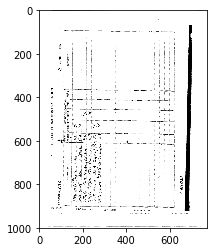

Class: 1 



In [3]:
for img, gt in cdip_train:
    print(img.shape)
    plt.imshow(img)
    plt.show()
    print("Class:", gt, "\n")
    break

### Add Data Augmentation

(320, 240, 3)


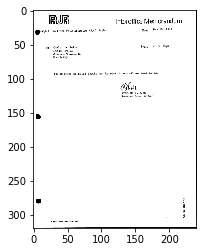

In [4]:
target_width, target_height = 240, 320

preprocess_imgs = [
    augmentation.DownScale(target_resolution=(target_width, target_height))
]

cdip_train = CDIP("/home/akoelsch/Downloads/rvl-cdip/", mode="train", channels=3, preprocess=preprocess_imgs)
cdip_val = CDIP("/home/akoelsch/Downloads/rvl-cdip/", mode="val", channels=3, preprocess=preprocess_imgs)
cdip_test = CDIP("/home/akoelsch/Downloads/rvl-cdip/", mode="test", channels=3, preprocess=preprocess_imgs)

img, gt = cdip_train[0]

print(img.shape)
plt.imshow(img)
plt.show()

### Add Conversion of Images to Tensors

In [5]:
preprocess_imgs = [
    augmentation.DownScale(target_resolution=(target_width, target_height)),
    conversion.ToFloat(),
    conversion.TransposeImage(),
    conversion.ToTensor()
]

cdip_train = CDIP("/home/akoelsch/Downloads/rvl-cdip/", mode="train", channels=3, preprocess=preprocess_imgs)

img, gt = cdip_train[0]

print(img.shape)
print(type(img), img.dtype)
print(type(gt), gt.dtype)

torch.Size([3, 320, 240])
<class 'torch.Tensor'> torch.float32
<class 'torch.Tensor'> torch.int64


### Create batches with parallel DataLoaders

In [6]:
train_loader = DataLoader(cdip_train, batch_size=32, shuffle=True, num_workers=8, drop_last=True, pin_memory=True)

for img, gt in train_loader:
    print(img.shape, gt.shape)
    break

torch.Size([32, 3, 320, 240]) torch.Size([32, 1])


# Working with the Tobacco-3482 dataset

### Creating the dataset objects

In [7]:
tobacco = Tobacco("/home/akoelsch/Downloads/Tobacco/")

print(tobacco)

Dataset Tobacco
    Root Location: /home/akoelsch/Downloads/Tobacco/
    Number of splits: 10
    Current split: 0
    Current mode: train
    Number of training images in current split: 800
    Number of validation images in current split: 200
    Number of test images in current split: 2482



### Changing between training, validation and testing

In [8]:
tobacco.load_split("train")
print(len(tobacco))

tobacco.load_split("val")
print(len(tobacco))

tobacco.load_split("test")
print(len(tobacco))

800
200
2482


### Alternatively, you can create three distinct object for train, val, test. If you do so, make sure the random state is the same!

In [9]:
tobacco_train = Tobacco("/home/akoelsch/Downloads/Tobacco/")
tobacco_val = Tobacco("/home/akoelsch/Downloads/Tobacco/")
tobacco_test = Tobacco("/home/akoelsch/Downloads/Tobacco/")

print(tobacco_train.random_state)
print(tobacco_val.random_state)
print(tobacco_test.random_state)

tobacco_train.load_split("train")
tobacco_val.load_split("val")
tobacco_test.load_split("test")

1337
1337
1337


### Using a different partition of the images

<span style="color:red">**Important:** When training the network on a new partition, always re-initialize the weights!</span>


In [10]:
for i in range(10):
    tobacco.load_split("train", i)
    print(tobacco.current_index)


0
1
2
3
4
5
6
7
8
9


### Add preprocessing and conversion

In [11]:
target_width, target_height = 240, 320

preprocess_imgs = [
    augmentation.DownScale(target_resolution=(target_width, target_height)),
    conversion.ToFloat(),
    conversion.TransposeImage(),
    conversion.ToTensor()
]

tobacco = Tobacco("/home/akoelsch/Downloads/Tobacco/", channels=3, preprocess=preprocess_imgs)

img, gt = tobacco[0]

print(img.shape)
print(gt)

torch.Size([3, 320, 240])
tensor([1])


### Create batches with parallel DataLoaders

In [12]:
train_loader = DataLoader(tobacco, batch_size=32, shuffle=True, num_workers=8, drop_last=True, pin_memory=True)

for img, gt in train_loader:
    print(img.shape, gt.shape)
    break

torch.Size([32, 3, 320, 240]) torch.Size([32, 1])
